### Import dataset

In [184]:
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.datasets import fetch_california_housing
# as_frame=True loads the data in a dataframe format, with other metadata besides it
california_housing = fetch_california_housing(as_frame=True)
# Select only the dataframe part and assign it to the df variable
df = california_housing.frame

In [185]:
import pandas as pd
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Outlier Removal

In [186]:
def outlier_rem(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    low = q1 - 1.5*iqr
    high = q3 + 1.5*iqr
    
    warnings.filterwarnings('ignore')
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[col])
    plt.subplot(2,2,2)
    sns.boxplot(df[col])
    
    df = df[~((df[col] >= high) | (df[col]<= low))]
    
    plt.subplot(2,2,3)
    sns.distplot(df[col])
    plt.subplot(2,2,4)
    sns.boxplot(df[col])
    
    return df

In [187]:
def outlierFreeDF(df):
    for col_name in df.columns:
        if col_name == 'MedHouseVal':
            pass
        else:
            new_df = outlier_rem(df,col_name)
    return new_df

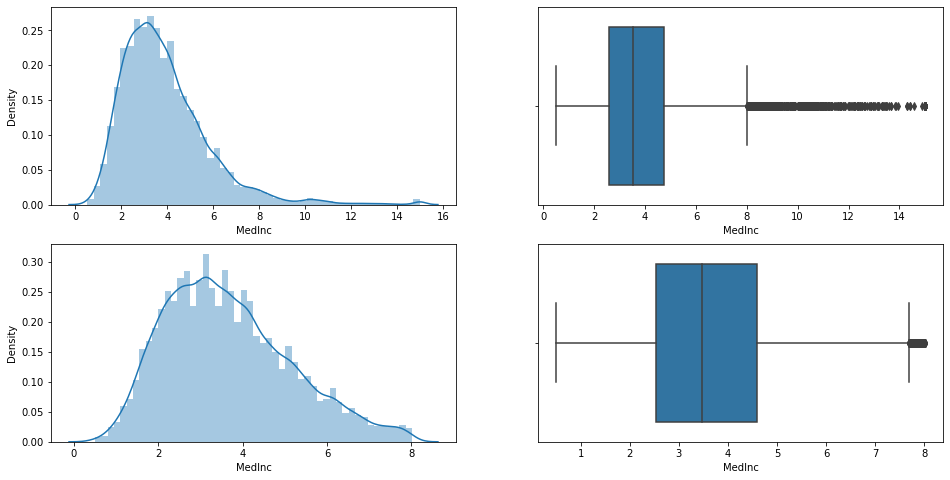

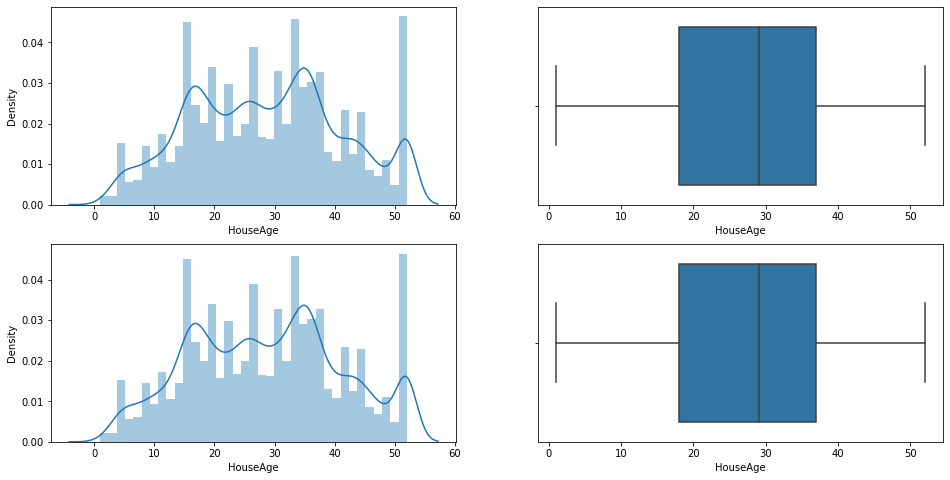

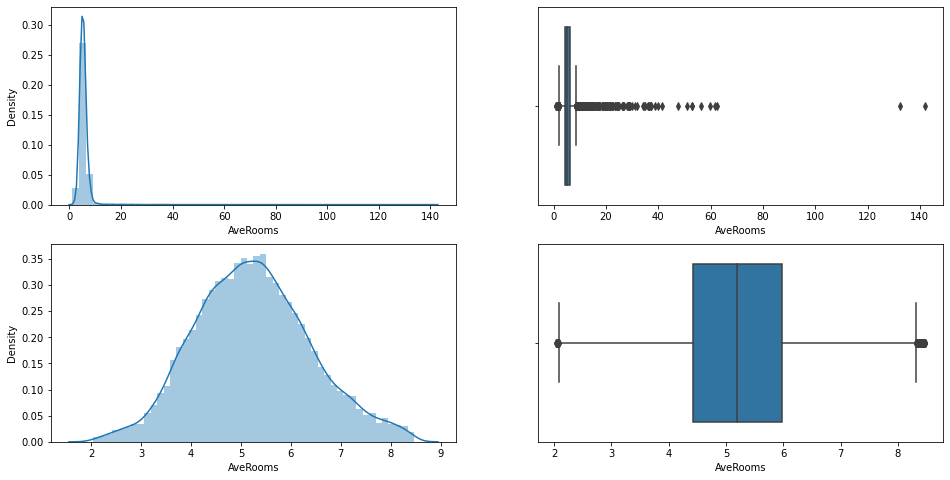

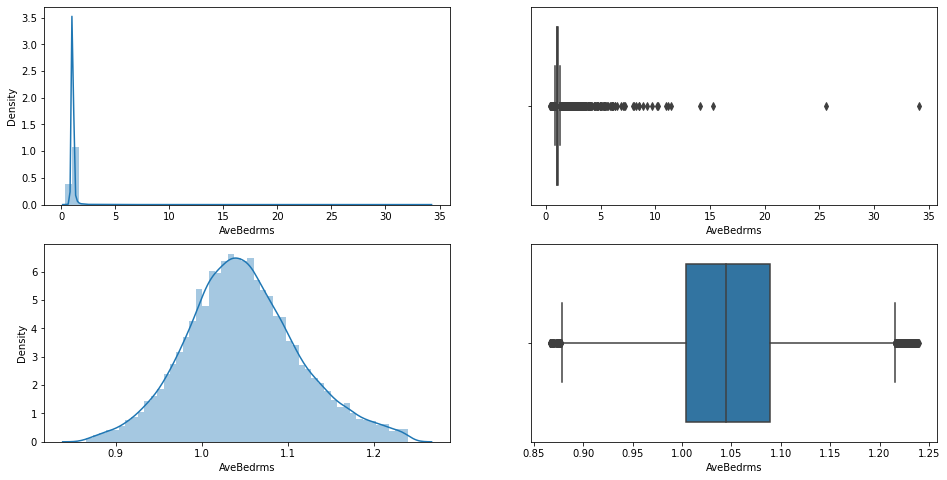

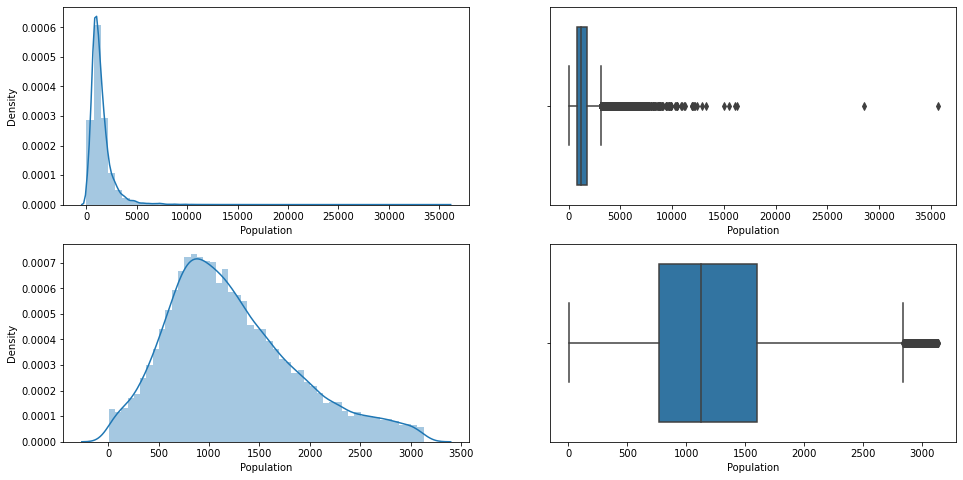

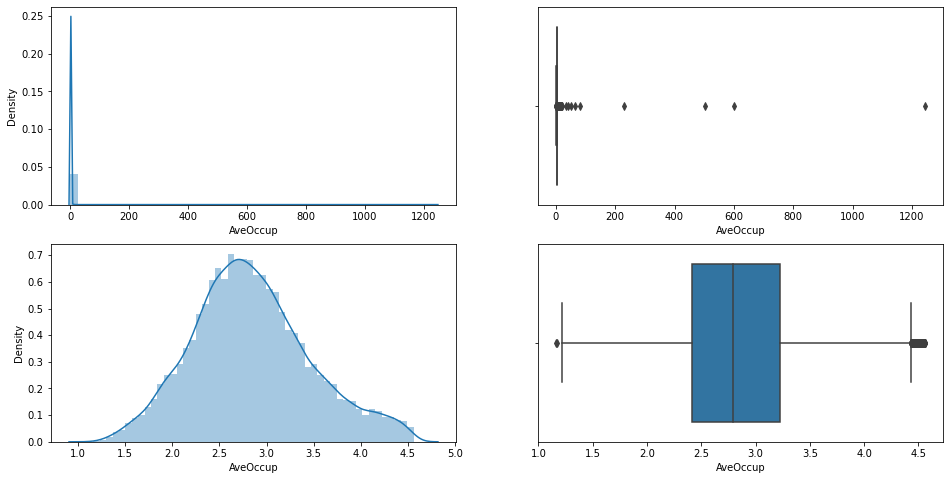

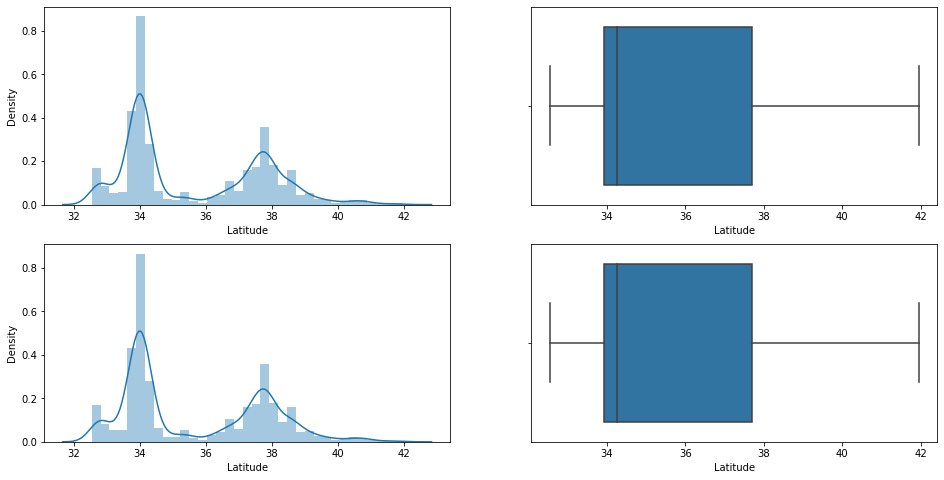

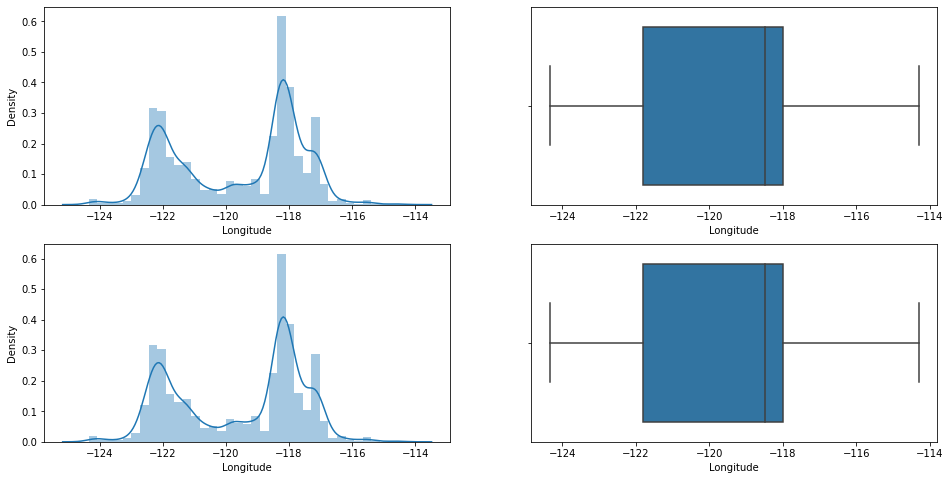

In [188]:
df = outlierFreeDF(df)

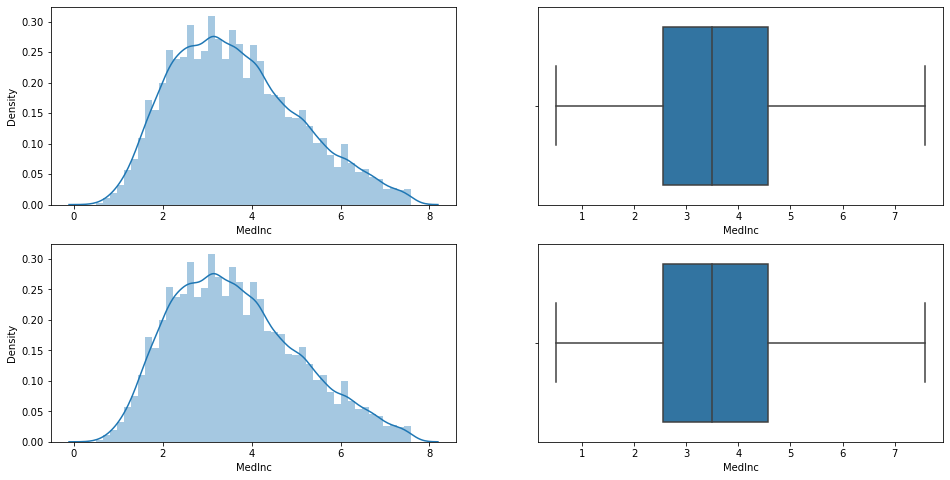

In [212]:
df = outlier_rem(df,'MedInc')

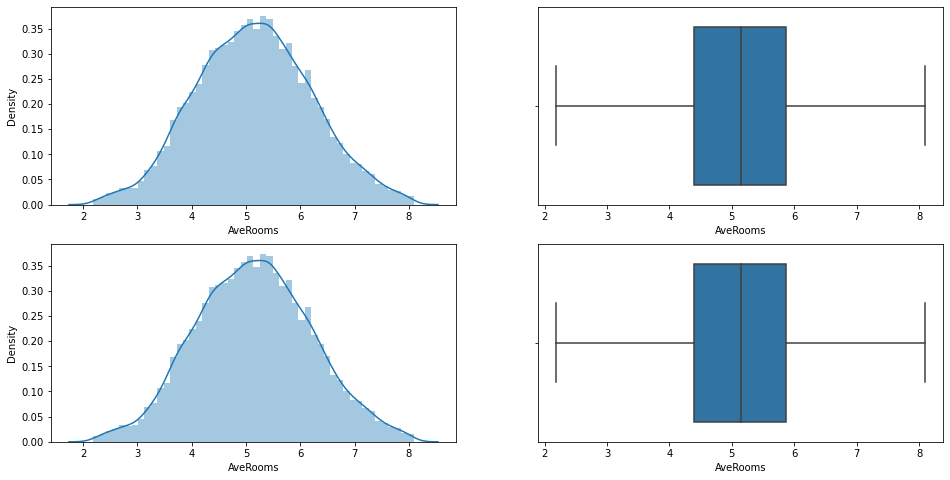

In [198]:
df = outlier_rem(df,'AveRooms')

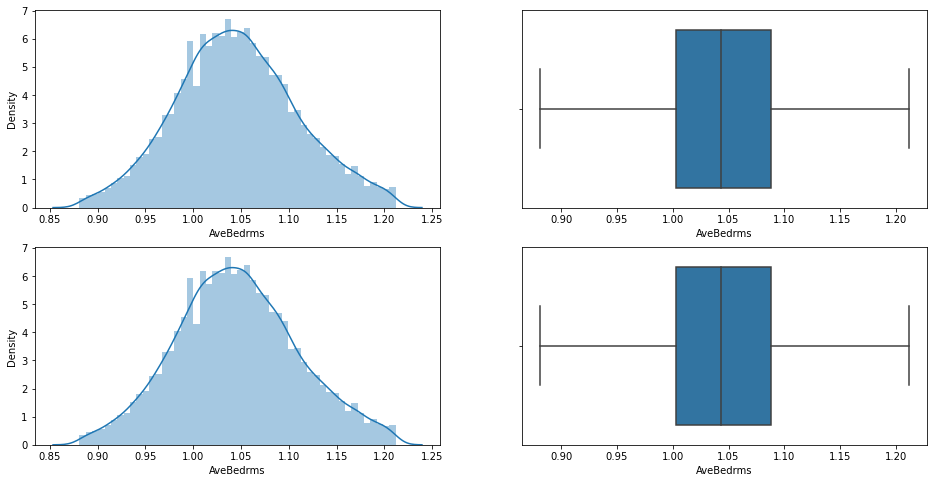

In [211]:
df = outlier_rem(df,'AveBedrms')

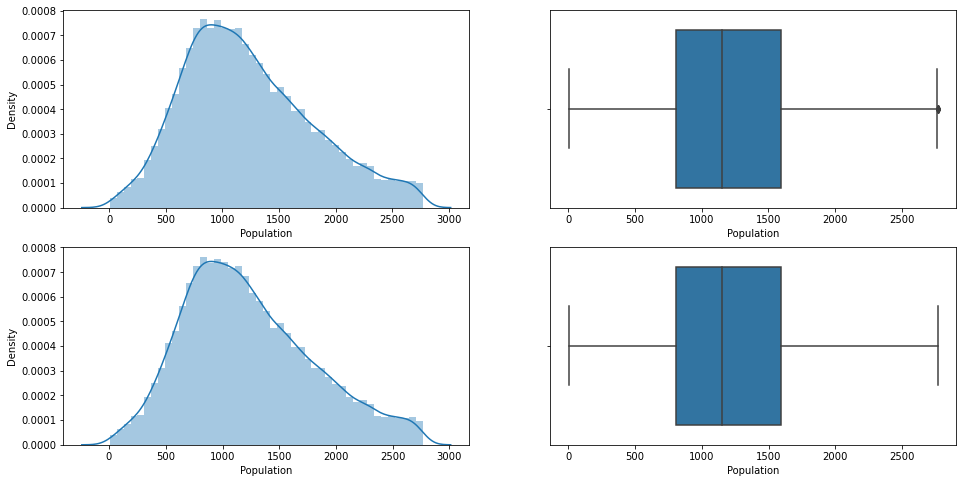

In [210]:
df = outlier_rem(df,'Population')

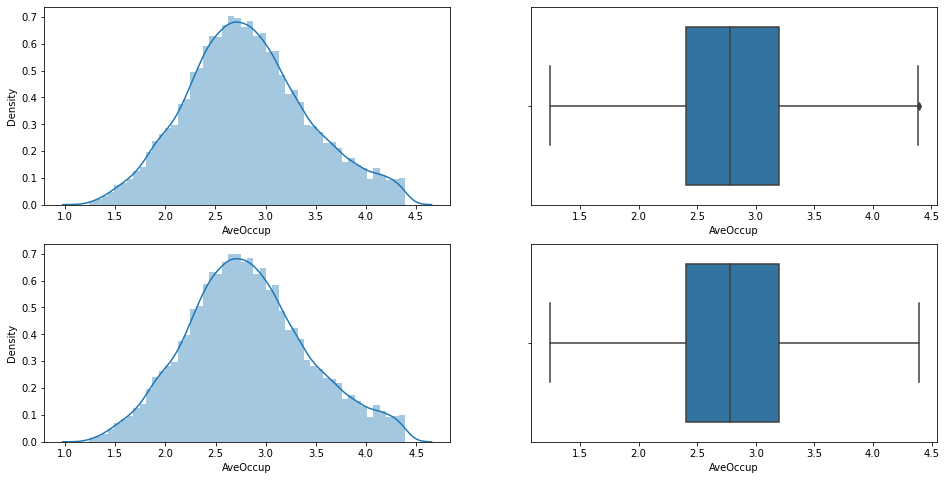

In [218]:
df = outlier_rem(df,'AveOccup')

### Preprocessing Data for KNN Regression

In [219]:
y = df['MedHouseVal']
X = df.drop(['MedHouseVal'], axis = 1)

In [220]:
# .T transposes the results, transforming rows into columns
X.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,15722.0,3.680112,1.422886,0.536000,2.587275,3.531300,4.625000,7.582200
HouseAge,15722.0,29.948734,12.196128,1.000000,20.000000,31.000000,38.000000,52.000000
AveRooms,15722.0,5.154144,1.018533,2.183946,4.441192,5.144867,5.842593,8.091954
AveBedrms,15722.0,1.045896,0.063829,0.880952,1.002454,1.043478,1.087659,1.211726
Population,15722.0,1221.852182,566.423530,5.000000,804.000000,1138.000000,1577.000000,2766.000000
AveOccup,15722.0,2.821394,0.608183,1.239617,2.405219,2.782847,3.200000,4.389251
Latitude,15722.0,35.683299,2.140788,32.540000,33.940000,34.310000,37.740000,41.950000
Longitude,15722.0,-119.651774,1.996803,-124.350000,-121.840000,-118.670000,-118.050000,-114.570000


### Splitting Data into Train and Test Sets

In [221]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [222]:
print(len(X))       # 20640
print(len(X_train)) # 15480
print(len(X_test))  # 5160

15722
11791
3931


### Feature Scaling for KNN Regression

In [223]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit only on X_train
scaler.fit(X_train)

# Scale both X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [224]:
col_names=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
scaled_df = pd.DataFrame(X_train, columns=col_names)
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,11791.0,2.228697e-16,1.000042,-2.211730,-0.771126,-0.107128,0.665198,2.731913
HouseAge,11791.0,-4.736173e-17,1.000042,-2.386754,-0.821595,0.084550,0.661187,1.814462
AveRooms,11791.0,3.796000e-16,1.000042,-2.926309,-0.696966,-0.014349,0.675915,2.878805
AveBedrms,11791.0,-2.764494e-15,1.000042,-2.596442,-0.683045,-0.039715,0.653110,2.585483
Population,11791.0,1.804077e-17,1.000042,-2.149535,-0.733592,-0.148784,0.622099,2.743356
AveOccup,11791.0,-4.219714e-16,1.000042,-2.603298,-0.680361,-0.071650,0.620561,2.577542
Latitude,11791.0,-3.844963e-16,1.000042,-1.468145,-0.813308,-0.621535,0.959428,2.933292
Longitude,11791.0,3.676824e-15,1.000042,-2.349238,-1.098521,0.472380,0.797567,2.543568


### Training and Predicting KNN Regression

In [225]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [226]:
y_pred = regressor.predict(X_test)

### Evaluating the Algorithm for KNN Regression

In [227]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mae: 0.4429201190536759
mse: 0.4044517518626222
rmse: 0.6359652127771002


In [228]:
regressor.score(X_test, y_test)

0.6331599557326018

In [229]:
y.describe()

count    15722.000000
mean         2.010953
std          1.057307
min          0.149990
25%          1.198000
50%          1.814500
75%          2.581000
max          5.000010
Name: MedHouseVal, dtype: float64

### Finding the Best K for KNN Regression

In [230]:
error = []

# Calculating MAE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)

Text(0, 0.5, 'Mean Absolute Error')

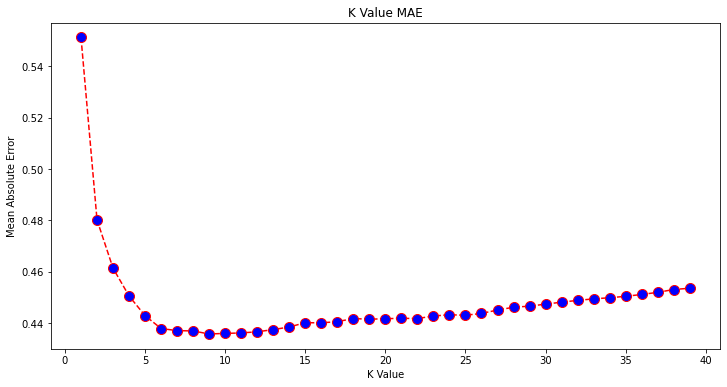

In [231]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

#### Looking at the plot, it seems the lowest MAE value is when K is 12. Let's get a closer look at the plot to be sure by plotting less data

Text(0, 0.5, 'Mean Absolute Error')

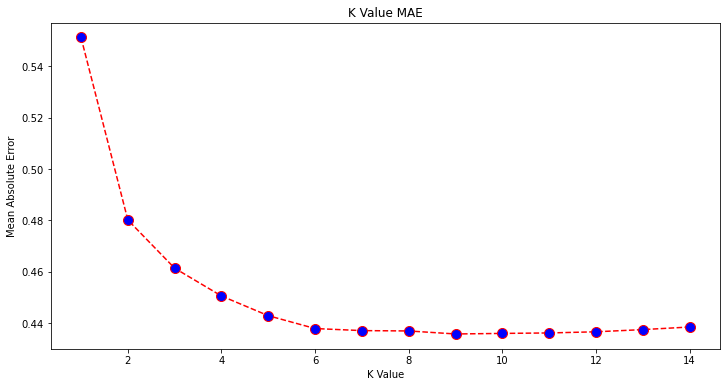

In [232]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), error[:14], color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

In [233]:
import numpy as np 

print(min(error))               # 0.43631325936692505
print(np.array(error).argmin()) # 11

0.43581095225981514
8


### KNN with 9 neighbours

In [237]:
knn_reg12 = KNeighborsRegressor(n_neighbors=9)
knn_reg12.fit(X_train, y_train)
y_pred12 = knn_reg12.predict(X_test)
r2 = knn_reg12.score(X_test, y_test) 

mae12 = mean_absolute_error(y_test, y_pred12)
mse12 = mean_squared_error(y_test, y_pred12)
rmse12 = mean_squared_error(y_test, y_pred12, squared=False)
print(f'r2: {r2}, \nmae: {mae12} \nmse: {mse12} \nrmse: {rmse12}')

r2: 0.6498425305857617, 
mae: 0.43581095225981514 
mse: 0.3860587308978182 
rmse: 0.6213362462449927


## Classification using K-Nearest Neighbors with Scikit-Learn

### Preprocessing Data for Classification

In [165]:
# Creating 4 categories and assigning them to a MedHouseValCat column
df["MedHouseValCat"] = pd.qcut(df["MedHouseVal"], 4, retbins=False, labels=[1, 2, 3, 4])

In [166]:
y = df['MedHouseValCat']
X = df.drop(['MedHouseVal', 'MedHouseValCat'], axis = 1)

### Splitting Data into Train and Test Sets

In [167]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

### Feature Scaling for Classification

In [168]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Training and Predicting for Classification

In [169]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [170]:
y_pred = classifier.predict(X_test)

### Evaluating KNN for Classification

In [171]:
acc =  classifier.score(X_test, y_test)
print(acc) # 0.6191860465116279

0.6191860465116279


              precision    recall  f1-score   support

           1       0.75      0.78      0.76      1292
           2       0.49      0.56      0.53      1283
           3       0.51      0.51      0.51      1292
           4       0.76      0.62      0.69      1293

    accuracy                           0.62      5160
   macro avg       0.63      0.62      0.62      5160
weighted avg       0.63      0.62      0.62      5160



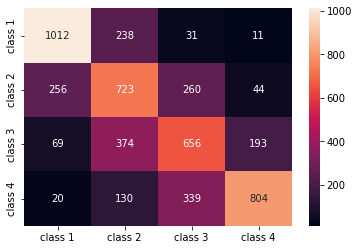

In [172]:
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap 
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3', 'class 4']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

### Finding the Best K for KNN Classification

In [173]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

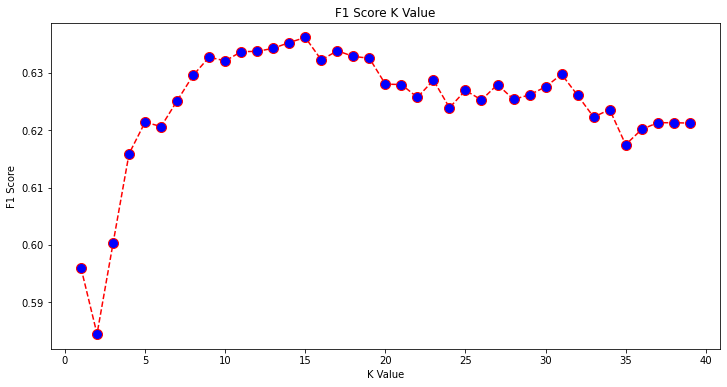

In [174]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

#### From the output, we can see that the f1-score is the highest when the value of the K is 15.

In [175]:
classifier15 = KNeighborsClassifier(n_neighbors=15)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))

              precision    recall  f1-score   support

           1       0.77      0.79      0.78      1292
           2       0.52      0.58      0.55      1283
           3       0.51      0.53      0.52      1292
           4       0.77      0.64      0.70      1293

    accuracy                           0.63      5160
   macro avg       0.64      0.63      0.64      5160
weighted avg       0.64      0.63      0.64      5160



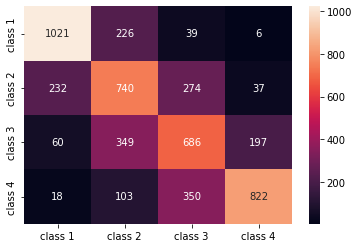

In [176]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred15), 
                  columns=classes_names, index = classes_names)

sns.heatmap(cm, annot=True, fmt='d');

## Implementing KNN for Outlier Detection with Scikit-Learn

In [177]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors = 5)
nbrs.fit(X_train)
# Distances and indexes of the 5 neighbors 
distances, indexes = nbrs.kneighbors(X_train)

In [178]:
distances[:3], distances.shape

(array([[0.        , 0.12998939, 0.15157687, 0.16543705, 0.17750354],
        [0.        , 0.25535314, 0.37100754, 0.39090243, 0.40619693],
        [0.        , 0.27149697, 0.28024623, 0.28112326, 0.30420656]]),
 (15480, 5))

In [179]:
indexes[:3], indexes[:3].shape

(array([[    0,  8608, 12831,  8298,  2482],
        [    1,  4966,  5786,  8568,  6759],
        [    2, 13326, 13936,  3618,  9756]], dtype=int64),
 (3, 5))

Text(0, 0.5, 'Mean Distances')

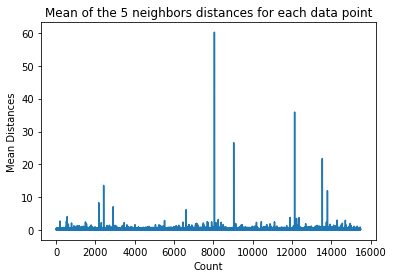

In [180]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 5 neighbors distances for each data point')
plt.xlabel('Count')
plt.ylabel('Mean Distances')

#### mean distance is 3. Let's plot the graph again with a horizontal dotted line to be able to spot it

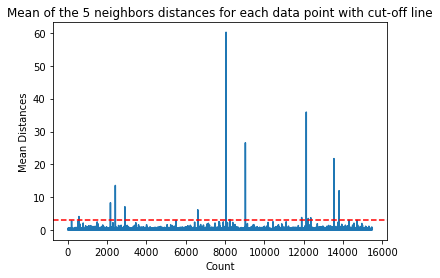

In [181]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 5 neighbors distances for each data point with cut-off line')
plt.xlabel('Count')
plt.ylabel('Mean Distances')
plt.axhline(y = 3, color = 'r', linestyle = '--')

In [182]:
import numpy as np

# Visually determine cutoff values > 3
outlier_index = np.where(dist_means > 3)
outlier_index

(array([  564,  2167,  2415,  2902,  6607,  8047,  8243,  9029, 11892,
        12127, 12226, 12353, 13534, 13795, 14292, 14707], dtype=int64),)

In [183]:
# Filter outlier values
outlier_values = df.iloc[outlier_index]
outlier_values

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,MedHouseValCat
564,4.8711,27.0,5.082811,0.944793,1499.0,1.880803,37.75,-122.24,2.86600,4
2167,2.8359,30.0,4.948357,1.001565,1660.0,2.597809,36.78,-119.83,0.80300,1
2415,2.8250,32.0,4.784232,0.979253,761.0,3.157676,36.59,-119.44,0.67600,1
2902,1.1875,48.0,5.492063,1.460317,129.0,2.047619,35.38,-119.02,0.63800,1
6607,3.5164,47.0,5.970639,1.074266,1700.0,2.936097,34.18,-118.14,2.26500,3
8047,2.7260,29.0,3.707547,1.078616,2515.0,1.977201,33.84,-118.17,2.08700,3
8243,2.0769,17.0,3.941667,1.211111,1300.0,3.611111,33.78,-118.18,1.00000,1
9029,6.8300,28.0,6.748744,1.080402,487.0,2.447236,34.05,-118.78,5.00001,4
11892,2.6071,45.0,4.225806,0.903226,89.0,2.870968,33.99,-117.35,1.12500,1
12127,4.1482,7.0,5.674957,1.106998,5595.0,3.235975,33.92,-117.25,1.24600,2
